## Author     : Alexandre Gerzewski Da Silva
## Problem  : https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work
## Github     : https://github.com/AlexandreG1998
## Emai        : alexandre19923@gmail.com

In [4]:
# Import numpy and pandas to prepare dataset

import pandas as pd
import numpy as np
import random

In [5]:
dataset = pd.read_csv('Absenteeism_at_work.csv', sep=';')
dataset.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day             ...              Disciplinary failure  \
0                 239.554            ...                                 0   
1                 239.554            ...                                 1   
2                 239.554            ...                                 0   
3                 239.554            ...                                 0   
4                 239.554            ...                                 0   

   Education  Son  Social drinker  Social smoker  Pet  Weight  Height  \
0          1    2               1              0    1      90     172   
1          1    1               1              0    0      98     178   
2          1    0               1              0    0      89     170   
3          1    2               1              1    0      68     168   
4          1    2               1              0    1      90     172   

   Body mass index  Absenteeism time in hours  
0               30                          4  
1               31                          0  
2               31                          2  
3               24                          4  
4               30                          2  

[5 rows x 21 columns]

In [6]:
dataset.shape

(740, 21)

In [7]:
cut = int(dataset.shape[0] * 0.5)

In [8]:
Y = dataset.iloc[:,20:]
dataset = dataset.drop('Absenteeism time in hours', axis = 1)
Y.head()

Absenteeism time in hours
0                          4
1                          0
2                          2
3                          4
4                          2

In [9]:
train_x = dataset[:cut].values
train_y = Y[:cut].values

test_x = dataset[cut:].values


In [10]:
Y_quartile = np.where( Y['Absenteeism time in hours'] <= np.percentile(train_y, q = 25) ,1,
                      np.where( (Y['Absenteeism time in hours'] <= np.percentile(train_y, q = 50)) & 
                               (Y['Absenteeism time in hours'] > np.percentile(train_y, q = 25)),2,
                               np.where( (Y['Absenteeism time in hours'] <= np.percentile(train_y, q = 75)) & 
                                        (Y['Absenteeism time in hours'] <= np.percentile(train_y, q = 50)),3,
                                        np.where(Y['Absenteeism time in hours'] > np.percentile(train_y, q = 75),4,0))))

In [11]:
train_y_quartile = Y_quartile[:cut]
test_y_quartile = Y_quartile[cut:]

## Plot a Y KDE

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
y_to_plot = pd.DataFrame(train_y_quartile)
y_to_plot.columns = ['Absenteeism time in hours']
sns.set_style('darkgrid')

Text(0.5,1,'Histogram of Frequency ')

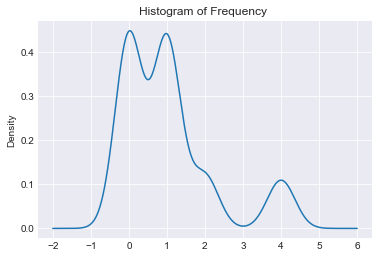

In [14]:
y_to_plot['Absenteeism time in hours'].plot.kde()
plt.title('Histogram of Frequency ')

## Create a Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
tree = DecisionTreeClassifier(max_depth= 30, min_samples_split = 5, min_samples_leaf = 3, 
                              max_leaf_nodes =30 )

In [17]:
tree.fit(train_x,train_y_quartile)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
names_features = list(dataset.columns)


In [19]:
classes_ = ['1','2','3','4','0']
classes_ = list(classes_)

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree_.dot', feature_names = names_features,class_names=classes_ ,rounded = True, proportion = False, precision = 2, filled = True)


In [21]:
!dot -Tpng tree_.dot -o tree_.png -Gdpi=600


In [22]:
from IPython.display import Image
Image(filename = 'tree_.png')

## Test model

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print('Train:')
print('Accuracy: ', 100 * accuracy_score(train_y_quartile, tree.predict(train_x)))
print('')
print('Test:')
print('Accuracy: ', 100 * accuracy_score(test_y_quartile, tree.predict(test_x)))

Train:
Accuracy:  78.37837837837837

Test:
Accuracy:  52.16216216216216


## Neural Network

Normalize Data

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
sc = MinMaxScaler(feature_range=(0,1))

In [62]:
train_x_scaled = sc.fit_transform(train_x)
test_x_scaled  = sc.transform(test_x)

## Create Model

In [81]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
import keras.utils 


In [82]:
model = None
model = Sequential()
model.add(Dense (units = train_x.shape[1], input_dim = train_x.shape[1], activation = 'relu'))
model.add(Dense (units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense (units = 32, activation = 'relu'))

model.add(Dense( 5, activation = 'softmax'))
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics=['acc'])

In [83]:
history = model.fit(train_x_scaled, keras.utils.np_utils.to_categorical(train_y_quartile), 
                    batch_size= 100,epochs =300)

Epoch 1/300
370/370 [==============================] - 3s 7ms/step - loss: 1.5860 - acc: 0.2865
Epoch 2/300
370/370 [==============================] - 0s 543us/step - loss: 1.4679 - acc: 0.4757
Epoch 3/300
370/370 [==============================] - 0s 619us/step - loss: 1.3737 - acc: 0.4270
Epoch 4/300
370/370 [==============================] - 0s 349us/step - loss: 1.3049 - acc: 0.4432
Epoch 5/300
370/370 [==============================] - 0s 338us/step - loss: 1.2649 - acc: 0.5027
Epoch 6/300
370/370 [==============================] - ETA: 0s - loss: 1.2428 - acc: 0.596 - 0s 459us/step - loss: 1.2264 - acc: 0.5946
Epoch 7/300
370/370 [==============================] - 0s 1ms/step - loss: 1.1935 - acc: 0.5730
Epoch 8/300
370/370 [==============================] - 1s 2ms/step - loss: 1.1575 - acc: 0.5649
Epoch 9/300
370/370 [==============================] - 0s 1ms/step - loss: 1.1278 - acc: 0.5973
Epoch 10/300
370/370 [==============================] - 0s 632us/step - loss: 1.1068 - a

370/370 [==============================] - 0s 473us/step - loss: 0.6373 - acc: 0.7405
Epoch 84/300
370/370 [==============================] - 0s 519us/step - loss: 0.6406 - acc: 0.7297
Epoch 85/300
370/370 [==============================] - 0s 508us/step - loss: 0.6315 - acc: 0.7459
Epoch 86/300
370/370 [==============================] - 0s 443us/step - loss: 0.6259 - acc: 0.7541
Epoch 87/300
370/370 [==============================] - 0s 451us/step - loss: 0.6239 - acc: 0.7351
Epoch 88/300
370/370 [==============================] - 0s 527us/step - loss: 0.6191 - acc: 0.7405
Epoch 89/300
370/370 [==============================] - 0s 346us/step - loss: 0.6246 - acc: 0.7297
Epoch 90/300
370/370 [==============================] - 0s 400us/step - loss: 0.6186 - acc: 0.7189
Epoch 91/300
370/370 [==============================] - 0s 465us/step - loss: 0.6213 - acc: 0.7514
Epoch 92/300
370/370 [==============================] - 0s 511us/step - loss: 0.6268 - acc: 0.7378
Epoch 93/300
370/370 [=

370/370 [==============================] - 0s 646us/step - loss: 0.4762 - acc: 0.8000
Epoch 165/300
370/370 [==============================] - 0s 338us/step - loss: 0.4665 - acc: 0.7973
Epoch 166/300
370/370 [==============================] - 0s 489us/step - loss: 0.4675 - acc: 0.7865
Epoch 167/300
370/370 [==============================] - 0s 551us/step - loss: 0.4533 - acc: 0.8189
Epoch 168/300
370/370 [==============================] - 0s 505us/step - loss: 0.4611 - acc: 0.7946
Epoch 169/300
370/370 [==============================] - 0s 687us/step - loss: 0.4523 - acc: 0.8054
Epoch 170/300
370/370 [==============================] - 0s 211us/step - loss: 0.4590 - acc: 0.8000
Epoch 171/300
370/370 [==============================] - 0s 395us/step - loss: 0.4687 - acc: 0.8027
Epoch 172/300
370/370 [==============================] - 0s 543us/step - loss: 0.4793 - acc: 0.7973
Epoch 173/300
370/370 [==============================] - 0s 532us/step - loss: 0.4544 - acc: 0.8135
Epoch 174/300


370/370 [==============================] - 0s 749us/step - loss: 0.3385 - acc: 0.8676
Epoch 246/300
370/370 [==============================] - 0s 365us/step - loss: 0.3257 - acc: 0.8865
Epoch 247/300
370/370 [==============================] - 0s 559us/step - loss: 0.3548 - acc: 0.8270
Epoch 248/300
370/370 [==============================] - 0s 522us/step - loss: 0.3323 - acc: 0.8622
Epoch 249/300
370/370 [==============================] - 0s 611us/step - loss: 0.3439 - acc: 0.8649
Epoch 250/300
370/370 [==============================] - 0s 570us/step - loss: 0.3237 - acc: 0.8784
Epoch 251/300
370/370 [==============================] - 0s 760us/step - loss: 0.3536 - acc: 0.8649
Epoch 252/300
370/370 [==============================] - 0s 995us/step - loss: 0.3480 - acc: 0.8541
Epoch 253/300
370/370 [==============================] - 0s 732us/step - loss: 0.3687 - acc: 0.8405
Epoch 254/300
370/370 [==============================] - 0s 403us/step - loss: 0.3324 - acc: 0.8676
Epoch 255/300


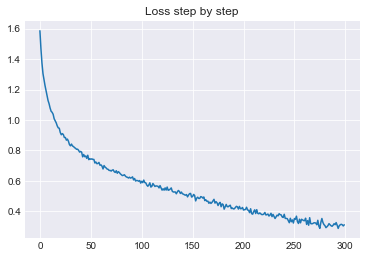

In [84]:
plt.plot(history.history['loss'])
plt.title('Loss step by step')
plt.show()

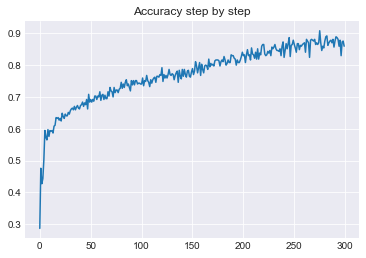

In [85]:
plt.plot(history.history['acc'])
plt.title('Accuracy step by step')
plt.show()

In [86]:
model.evaluate(test_x_scaled,  keras.utils.np_utils.to_categorical(test_y_quartile))

370/370 [==============================] - 1s 1ms/step


[2.6667735383317277, 0.4702702709146448]

## Conclusion:
In thist version the Neural Network is overfitting, in the next I'll do a better normalization, the Decision Tree is better but with just 52% of accuracy and still with overfitting